## Final Project Submission

Please fill out:
* Student name: Cecilia Ngunjiri
* Student pace: Part Time
* Scheduled project review date/time: 1st September 2024
* Instructor name: Samuel Karu
* Blog post URL:


## Business Understanding

### Business Problem Statement

### Objective

To identify and mitigate customer churn for SyriaTel, a telecommunications company, by developing predictive models that can accurately forecast which customers are likely to stop doing business with the company in the near future.

 The goal is to build a classification model that can predict whether a customer will churn soon (binary outcome: 0 for "not churn" and 1 for "churn") based on historical data.

Customer churn, or the rate at which customers discontinue their subscription or service, is a critical issue for telecommunications companies. High churn rates can significantly impact revenue and operational efficiency. Understanding and predicting churn is crucial for implementing effective retention strategies and improving customer satisfaction.

### Column Descriptions

State: The state where the customer is located.

Account Length: How long the customer has had their account.

Area Code: The area code of the customer’s phone number.

Phone Number: The customer's phone number.

International Plan: Whether the customer has an international calling plan (yes/no).

Voice Mail Plan: Whether the customer has a voicemail plan (yes/no).

Number Vmail Messages: The number of voicemail messages.

Total Day Minutes, Calls, Charge: Usage and cost information for daytime calls.

Total Eve Minutes, Calls, Charge: Usage and cost information for evening calls.

Total Night Minutes, Calls, Charge: Usage and cost information for night calls.

Total Intl Minutes, Calls, Charge: Usage and cost information for international calls.

Customer Service Calls: Number of calls the customer made to customer service.

Churn: Whether the customer has stopped using the service (yes/no).

## Data Understanding

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
# Load the dataset
data = pd.read_csv('telecom_churn.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
data.shape

(3333, 21)

In [7]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Missing Values

Checking for missing values in our dataset

In [9]:
data.isna().sum()
#there are no missing values in the dataset

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## Data Preparation and EDA

<AxesSubplot:xlabel='churn', ylabel='count'>

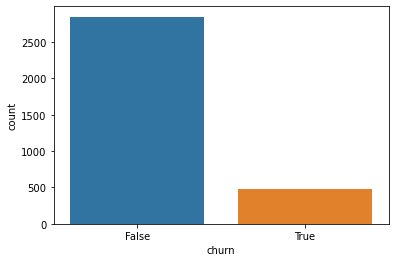

In [14]:
sns.countplot(data=data, x='churn')
#checking how many of our customers have churned ie true, and how many have not false

In [10]:
#encoding categorical data/columns into 0 to mean no/false and 1 to mean yes/true
data = data.replace(['yes', 'no'], ['1', '0'])
data[['international plan', 'voice mail plan']] = data[['international plan', 'voice mail plan']].astype(int).astype(int)

In [11]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:xlabel='international plan', ylabel='count'>

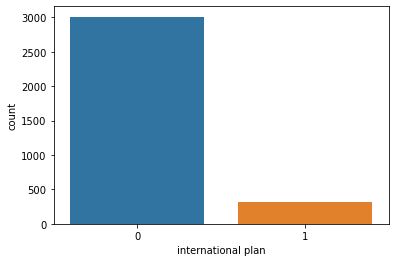

In [12]:
sns.countplot(data=data, x='international plan')
#This helps you quickly see how many customers have an international plan compared to those who don't.

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

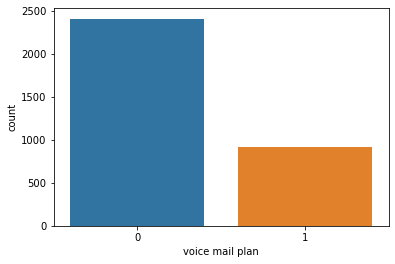

In [13]:
sns.countplot(data=data, x='voice mail plan')
#This helps you quickly see how many customers have an voice mail plan compared to those who don't.

In [19]:
#create two new columns in your dataset that aggregate total calls and total minutes for each customer. 
#print out summary statistics for both of these new columns
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls'] + data['customer service calls']
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']

print(data['total calls'].describe(), data['total minutes'].describe(), sep='\n\n')

count    3333.00000
mean      306.69997
std        34.44939
min       194.00000
25%       284.00000
50%       307.00000
75%       330.00000
max       418.00000
Name: total calls, dtype: float64

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: total minutes, dtype: float64


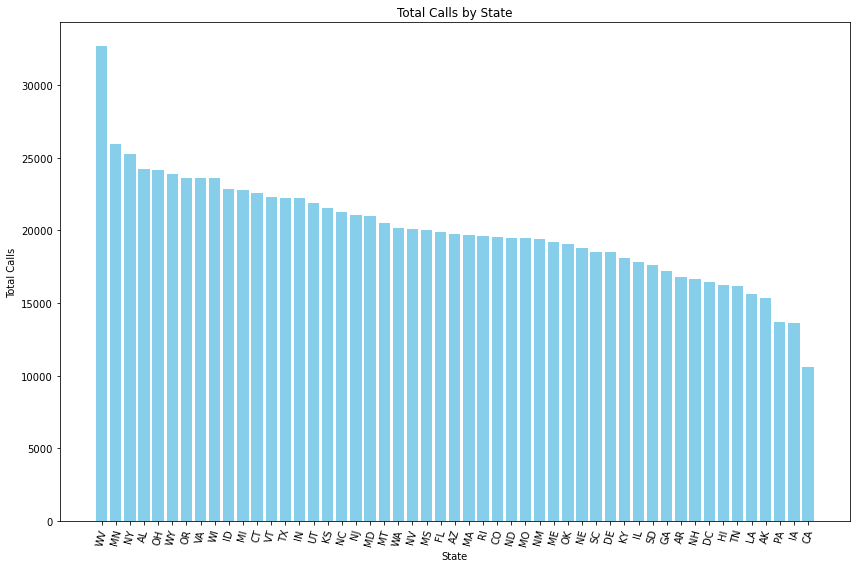

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and the code you provided has been executed

# Grouping and sorting data as per your code
calls_by_state = data.groupby('state')['total calls'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))  # Set figure size (optional)
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Calls by State')  # Title of the graph
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()

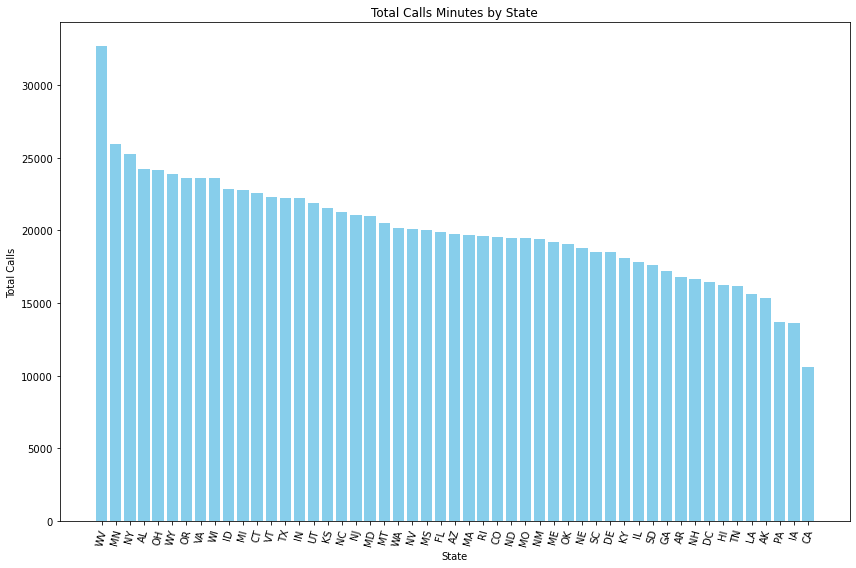

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping and sorting data 
minutes_by_state = data.groupby('state')['total minutes'].sum().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8)) 
plt.bar(calls_by_state.index, calls_by_state.values, color='skyblue')
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Total Calls')  # Label for y-axis
plt.title('Total Calls Minutes by State')  # Title of the graph
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


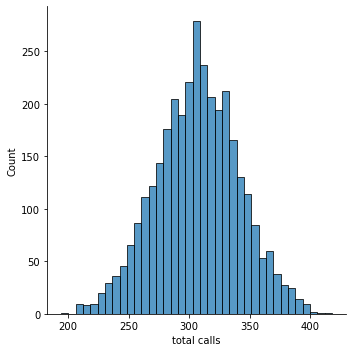

In [23]:
sns.displot(data=data, x=data['total calls'])
# visual summary of how customer call are distributed

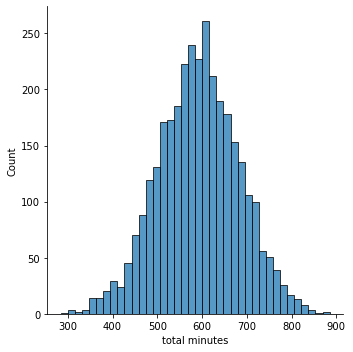

In [24]:
sns.displot(data=data, x=data['total minutes'])
# visual summary of how customer minutes  are distributed

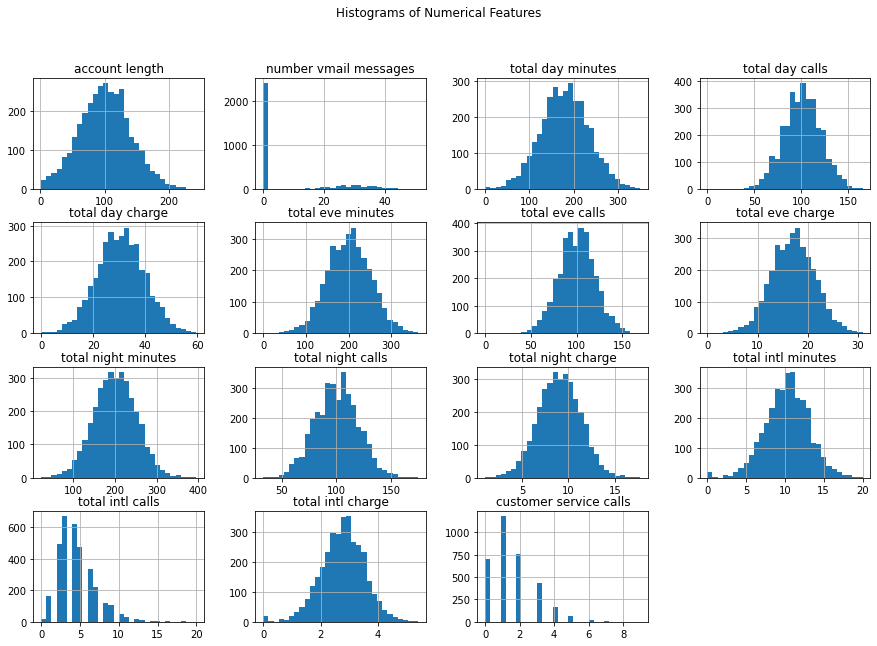

In [25]:
# Plotting distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                       'total night minutes', 'total night calls', 'total night charge', 
                       'total intl minutes', 'total intl calls', 'total intl charge', 
                       'customer service calls']

data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()
#visual summary of the distribution of various numerical features

In [27]:
#insights on customer behavior and usage patterns across different states
calls_by_state = data.groupby('state')['total calls'].sum().sort_values(ascending=False)
minutes_by_state = data.groupby('state')['total minutes'].sum().sort_values(ascending=False)

avg_minutes_by_state = data.groupby('state')['total minutes'].mean().sort_values(ascending=False)
avg_calls_by_state = data.groupby('state')['total calls'].mean().sort_values(ascending=False)
records_by_state = data.groupby('state')['churn'].count().sort_values(ascending=False)

print(avg_minutes_by_state.head())
print(avg_calls_by_state.head())
print(records_by_state.head())


state
IN    619.323944
NJ    611.707353
KS    608.884286
MA    608.644615
TN    606.994340
Name: total minutes, dtype: float64
state
GA    318.351852
FL    315.809524
ND    314.258065
ID    312.931507
NC    312.911765
Name: total calls, dtype: float64
state
WV    106
MN     84
NY     83
AL     80
OR     78
Name: churn, dtype: int64


## Feature Engineering and Preprocessing